In [543]:
#Data Glacier Project 1

import pandas as pd
import numpy as np
import datetime
from scipy import stats
import matplotlib.pyplot as plt

cab_df = pd.read_csv("C://Users/farhe/Downloads/DataSets-main/DataSets-main/Cab_Data.csv")
cab_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [544]:
cab_df.dtypes

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

In [545]:
start =pd.Timestamp('1899-12-30')
cab_df["Date of Travel"] = pd.to_datetime(cab_df["Date of Travel"], unit="D", origin = start)
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [546]:
cab_df.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000


In [547]:
cab_df.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [548]:
#Transaction Dataset

transaction_df = pd.read_csv("C://Users/farhe/Downloads/DataSets-main/DataSets-main/Transaction_ID.csv")
transaction_df

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [549]:
transaction_df.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


In [550]:
transaction_df.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [551]:
#cab_df["Company"].value_counts()

In [552]:
#City dataset
city_df = pd.read_csv("C://Users/farhe/Downloads/DataSets-main/DataSets-main/City.csv")
city_df

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [553]:
city_df.describe

<bound method NDFrame.describe of                 City   Population      Users
0        NEW YORK NY   8,405,837    302,149 
1         CHICAGO IL   1,955,130    164,468 
2     LOS ANGELES CA   1,595,037    144,132 
3           MIAMI FL   1,339,155     17,675 
4     SILICON VALLEY   1,177,609     27,247 
5      ORANGE COUNTY   1,030,185     12,994 
6       SAN DIEGO CA     959,307     69,995 
7         PHOENIX AZ     943,999      6,133 
8          DALLAS TX     942,908     22,157 
9         ATLANTA GA     814,885     24,701 
10         DENVER CO     754,233     12,421 
11         AUSTIN TX     698,371     14,978 
12        SEATTLE WA     671,238     25,063 
13         TUCSON AZ     631,442      5,712 
14  SAN FRANCISCO CA     629,591    213,609 
15     SACRAMENTO CA     545,776      7,044 
16     PITTSBURGH PA     542,085      3,643 
17     WASHINGTON DC     418,859    127,001 
18      NASHVILLE TN     327,225      9,270 
19         BOSTON MA     248,968     80,021 >

In [554]:
#changing the datatypes of Population and Users

city_df['Population'] = [x.replace(',', '') for x in city_df['Population']]
city_df['Population'] = city_df['Population'].astype(float)

#changing the datatype of Users
city_df['Users'] = [x.replace(',', '') for x in city_df['Users']]
city_df['Users'] = city_df['Users'].astype(int)



In [555]:
city_df.dtypes

City           object
Population    float64
Users           int32
dtype: object

In [556]:
city_df.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [557]:
#customer dataset

cust_df = pd.read_csv("C://Users/farhe/Downloads/DataSets-main/DataSets-main/Customer_ID.csv")
cust_df

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [558]:
cust_df.describe(include = 'all')

,Customer ID,Gender,Age,Income (USD/Month)
count,49171.000000,49171,49171.000000,49171.000000
unique,NaN,2,NaN,NaN
top,NaN,Male,NaN,NaN
freq,NaN,26562,NaN,NaN
mean,28398.252283,NaN,35.363121,15015.631856
std,17714.137333,NaN,12.599066,8002.208253
min,1.000000,NaN,18.000000,2000.000000
25%,12654.500000,NaN,25.000000,8289.500000
50%,27631.000000,NaN,33.000000,14656.000000
75%,43284.500000,NaN,42.000000,21035.000000


In [559]:
#df.drop(columns = ["Gender", "Age"], axis =1, inplace=True)


In [560]:
#Merge all the datasets
df = cab_df.merge(transaction_df, on= 'Transaction ID').merge(cust_df, on ='Customer ID').merge(city_df, on = 'City')

In [561]:
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885.0,24701
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885.0,24701
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885.0,24701
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885.0,24701
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885.0,24701


In [562]:
df.dtypes

Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Population                   float64
Users                          int32
dtype: object

In [563]:
#one hot encoding

encoded = pd.get_dummies(df, columns = ['Company', 'Payment_Mode', 'Gender'])
encoded

,Transaction ID,Date of Travel,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users,Company_Pink Cab,Company_Yellow Cab,Payment_Mode_Card,Payment_Mode_Cash,Gender_Female,Gender_Male
0,10000011,2016-01-08,ATLANTA GA,30.45,370.95,313.6350,29290,28,10813,814885.0,24701,1,0,1,0,0,1
1,10351127,2018-07-21,ATLANTA GA,26.19,598.70,317.4228,29290,28,10813,814885.0,24701,0,1,0,1,0,1
2,10412921,2018-11-23,ATLANTA GA,42.55,792.05,597.4020,29290,28,10813,814885.0,24701,0,1,1,0,0,1
3,10000012,2016-01-06,ATLANTA GA,28.62,358.52,334.8540,27703,27,9237,814885.0,24701,1,0,1,0,0,1
4,10320494,2018-04-21,ATLANTA GA,36.38,721.10,467.1192,27703,27,9237,814885.0,24701,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-03-03,WASHINGTON DC,38.40,668.93,525.3120,51406,29,6829,418859.0,127001,0,1,0,1,1,0
359388,10319775,2018-04-13,WASHINGTON DC,3.57,67.60,44.5536,51406,29,6829,418859.0,127001,0,1,0,1,1,0
359389,10347676,2018-07-06,WASHINGTON DC,23.46,331.97,337.8240,51406,29,6829,418859.0,127001,0,1,1,0,1,0
359390,10358624,2018-08-02,WASHINGTON DC,27.60,358.23,364.3200,51406,29,6829,418859.0,127001,0,1,0,1,1,0


In [564]:
encoded.isnull().sum()

Transaction ID        0
Date of Travel        0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
Company_Pink Cab      0
Company_Yellow Cab    0
Payment_Mode_Card     0
Payment_Mode_Cash     0
Gender_Female         0
Gender_Male           0
dtype: int64

In [565]:
import seaborn as sns
import matplotlib.pyplot as plt

cor_rel = encoded.corr()
cor_rel

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users,Company_Pink Cab,Company_Yellow Cab,Payment_Mode_Card,Payment_Mode_Cash,Gender_Female,Gender_Male
Transaction ID,1.000000,-0.001429,-0.052902,-0.003462,-0.016912,-0.001267,-0.001570,0.023868,0.013526,0.013914,-0.013914,0.001260,-0.001260,0.015878,-0.015878
KM Travelled,-0.001429,1.000000,0.835753,0.981848,0.000389,-0.000369,-0.000544,-0.002311,-0.000428,-0.000333,0.000333,0.000766,-0.000766,0.001350,-0.001350
Price Charged,-0.052902,0.835753,1.000000,0.859812,-0.177324,-0.003084,0.003228,0.326589,0.281061,-0.227986,0.227986,-0.000226,0.000226,-0.012661,0.012661
Cost of Trip,-0.003462,0.981848,0.859812,1.000000,0.003077,-0.000189,-0.000633,0.015108,0.023628,-0.133713,0.133713,0.000898,-0.000898,-0.000495,0.000495
Customer ID,-0.016912,0.000389,-0.177324,0.003077,1.000000,-0.004735,-0.013608,-0.647052,-0.610742,-0.020326,0.020326,-0.000566,0.000566,0.035036,-0.035036
Age,-0.001267,-0.000369,-0.003084,-0.000189,-0.004735,1.000000,0.003907,-0.009002,-0.005906,-0.000630,0.000630,0.001118,-0.001118,-0.003366,0.003366
Income (USD/Month),-0.001570,-0.000544,0.003228,-0.000633,-0.013608,0.003907,1.000000,0.011868,0.010464,0.000712,-0.000712,0.000866,-0.000866,0.000991,-0.000991
Population,0.023868,-0.002311,0.326589,0.015108,-0.647052,-0.009002,0.011868,1.000000,0.915490,-0.130920,0.130920,-0.001544,0.001544,-0.043593,0.043593
Users,0.013526,-0.000428,0.281061,0.023628,-0.610742,-0.005906,0.010464,0.915490,1.000000,-0.180476,0.180476,-0.001709,0.001709,-0.060886,0.060886
Company_Pink Cab,0.013914,-0.000333,-0.227986,-0.133713,-0.020326,-0.000630,0.000712,-0.130920,-0.180476,1.000000,-1.000000,-0.001026,0.001026,0.017279,-0.017279


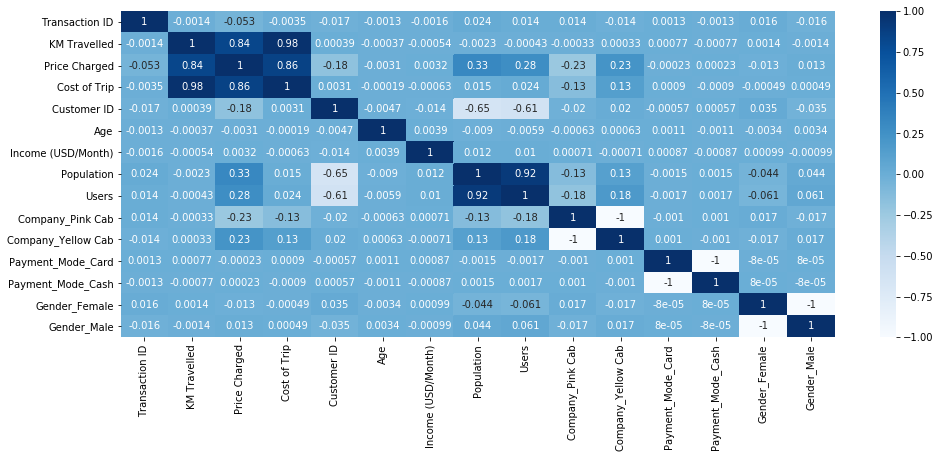

In [566]:
plt.figure(figsize = (16, 6))
sns.heatmap(cor_rel, annot = True, cmap = plt.cm.Blues)
plt.show()

There is a correlation between Customer ID, Price charged, Users, KM Travelled. 

In [567]:
#Correlation with output variable
cor_rel_out = abs(cor_rel["Company_Yellow Cab"])
cor_rel_out

Transaction ID        0.013914
KM Travelled          0.000333
Price Charged         0.227986
Cost of Trip          0.133713
Customer ID           0.020326
Age                   0.000630
Income (USD/Month)    0.000712
Population            0.130920
Users                 0.180476
Company_Pink Cab      1.000000
Company_Yellow Cab    1.000000
Payment_Mode_Card     0.001026
Payment_Mode_Cash     0.001026
Gender_Female         0.017279
Gender_Male           0.017279
Name: Company_Yellow Cab, dtype: float64

In [568]:
cols = np.full((cor_rel.shape[0], ), True, dtype = bool)
for i in range(cor_rel.shape[0]):
    for j in range(i+1, cor_rel.shape[0]):
        if cor_rel.iloc[i, j] >=0.9:
            if cols[j]:
                cols[j] = False

In [569]:
#correlation function

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j] > threshold):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                
    return col_corr





In [570]:
corr_features = correlation(encoded, 0.8)
corr_features

{'Cost of Trip', 'Price Charged', 'Users'}

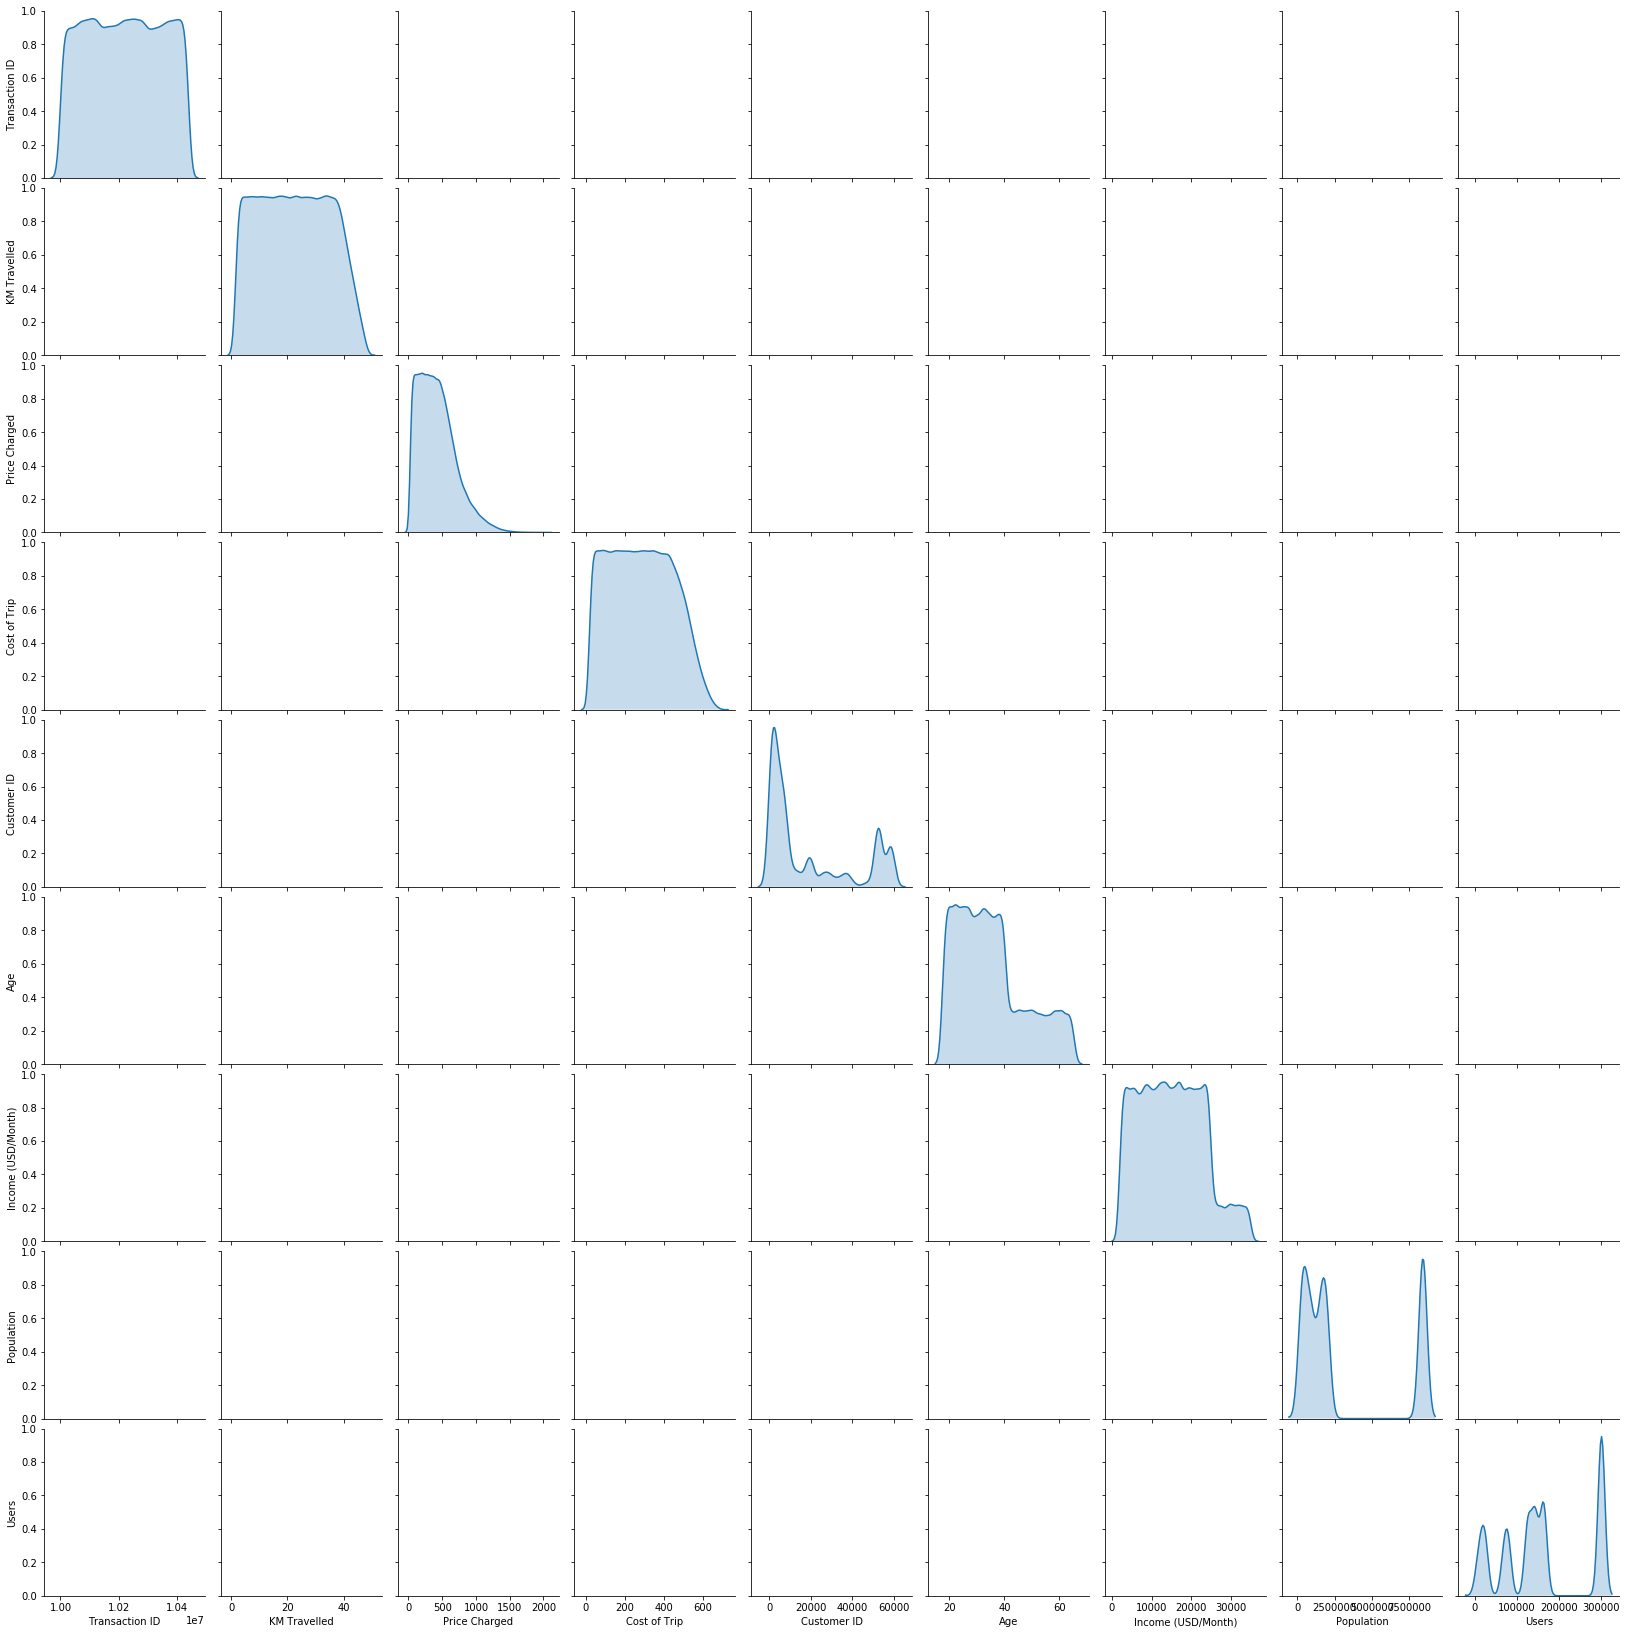

In [571]:
#Exploring the relationship between all the features

sns.pairplot(data = df, kind = 'kde', diag_kind  = 'kde')

# USERS 

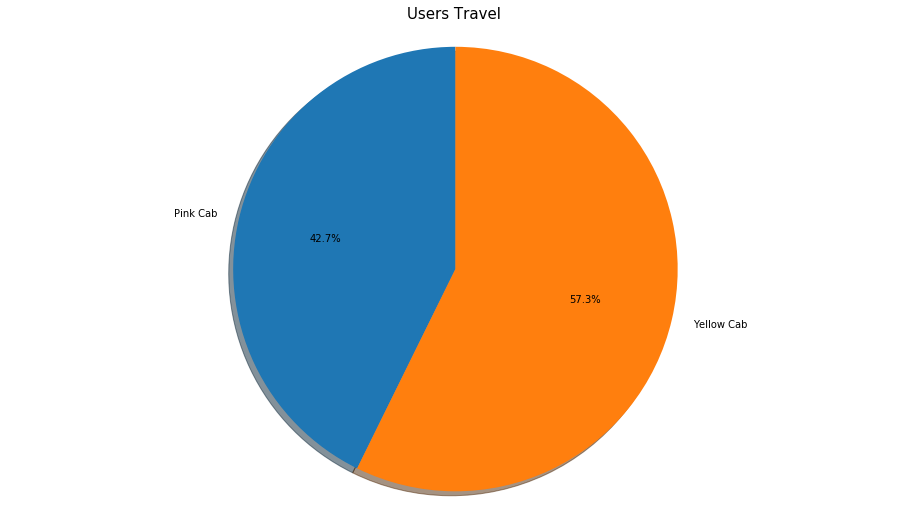

In [572]:
user = df.groupby('Company')
avg_user = user.Users.mean()
index = avg_user.index
value = avg_user.values

figp, axp = plt.subplots(figsize=(16, 9))
axp.pie(value , labels=index, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Users Travel', fontsize = 15)
plt.show()

In [573]:
#Yellow cab has more users than pink cab. 

# Users in each city

In [574]:
city_users = df.groupby('City').Users.count()
city_users

City
ATLANTA GA         7557
AUSTIN TX          4896
BOSTON MA         29692
CHICAGO IL        56625
DALLAS TX          7017
DENVER CO          3825
LOS ANGELES CA    48033
MIAMI FL           6454
NASHVILLE TN       3010
NEW YORK NY       99885
ORANGE COUNTY      3982
PHOENIX AZ         2064
PITTSBURGH PA      1313
SACRAMENTO CA      2367
SAN DIEGO CA      20488
SEATTLE WA         7997
SILICON VALLEY     8519
TUCSON AZ          1931
WASHINGTON DC     43737
Name: Users, dtype: int64

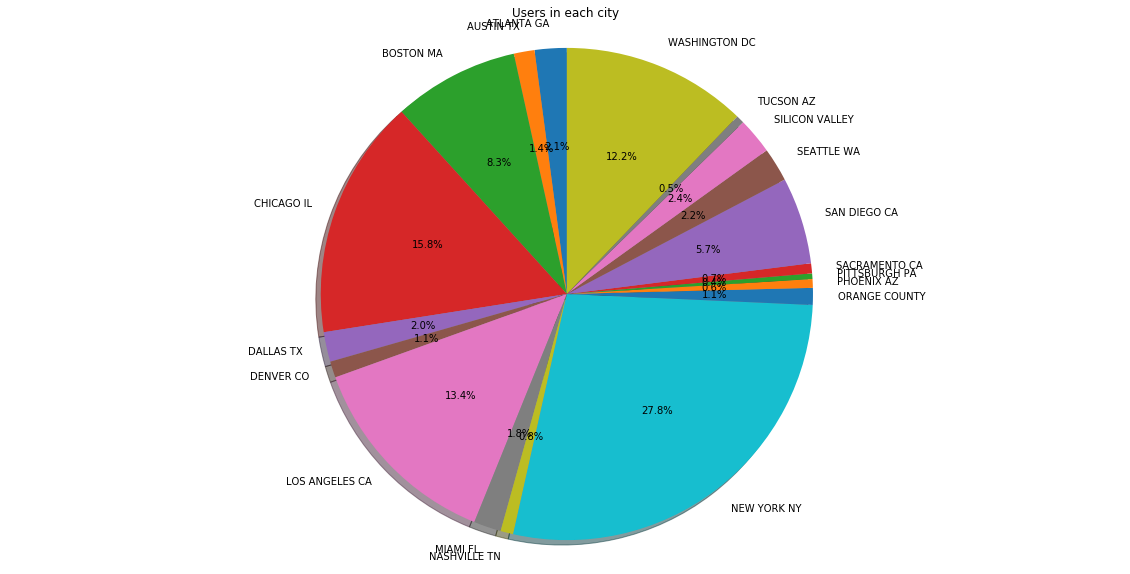

In [575]:
label = city_users.index
value = city_users.values
figp, axp = plt.subplots(figsize = (20, 10))
axp.pie(value, labels = label, autopct = '%1.1f%%', shadow=True, startangle=90, )
axp.axis('equal')
plt.title('Users in each city')
plt.show()

As per the above graph, NewYork city has more users. 

# Price charged for each company

In [576]:
price_charged = df.groupby(['Company', 'Price Charged']).Company.count()
price_charged

Company     Price Charged
Pink Cab    15.60            1
            15.75            1
            16.38            1
            16.53            1
            16.76            1
                            ..
Yellow Cab  1981.05          1
            1993.83          1
            2013.95          1
            2016.70          1
            2048.03          1
Name: Company, Length: 143862, dtype: int64

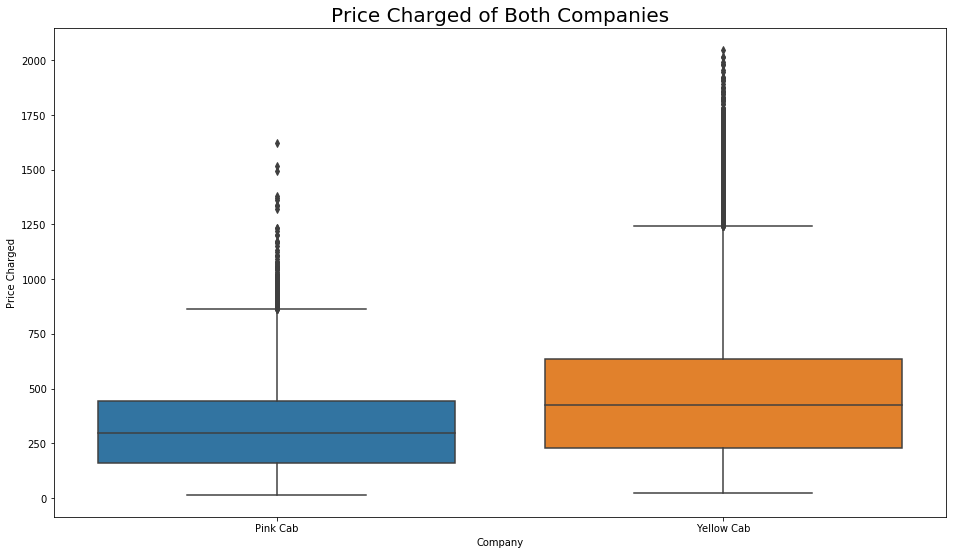

In [577]:
plt.figure(figsize = (16, 9))

sns.boxplot(df['Company'], df['Price Charged'])
plt.title('Price Charged of Both Companies', fontsize=20)
plt.show()

In [578]:
#Yellow cab charges are high compared to pink cab. 

# KM Travelled

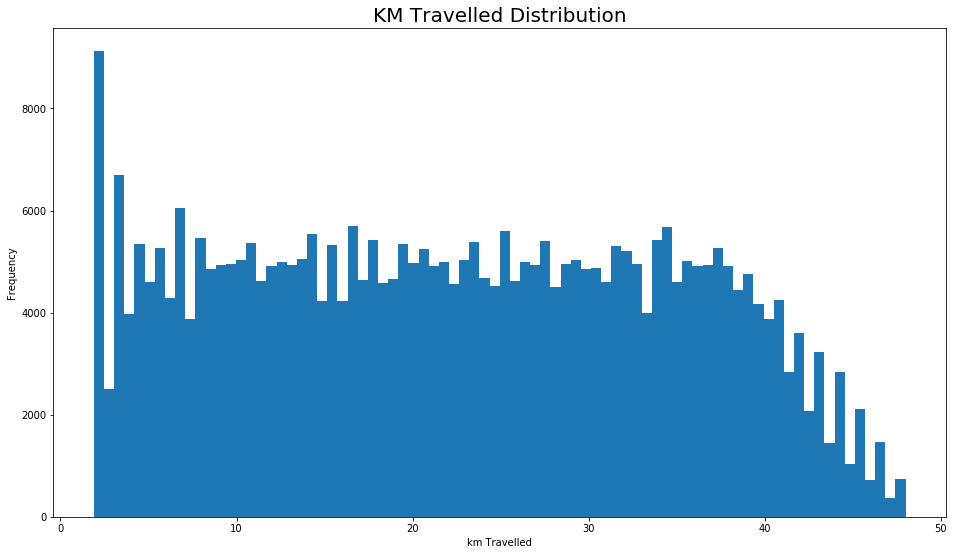

In [579]:
plt.figure(figsize = (16, 9))
plt.hist(df['KM Travelled'], bins = 80)
plt.title('KM Travelled Distribution', fontsize = 20)
plt.ylabel('Frequency')
plt.xlabel('km Travelled')
plt.show()


In [580]:
#The distance varies from 2KM to 48KM

# Payment Mode 

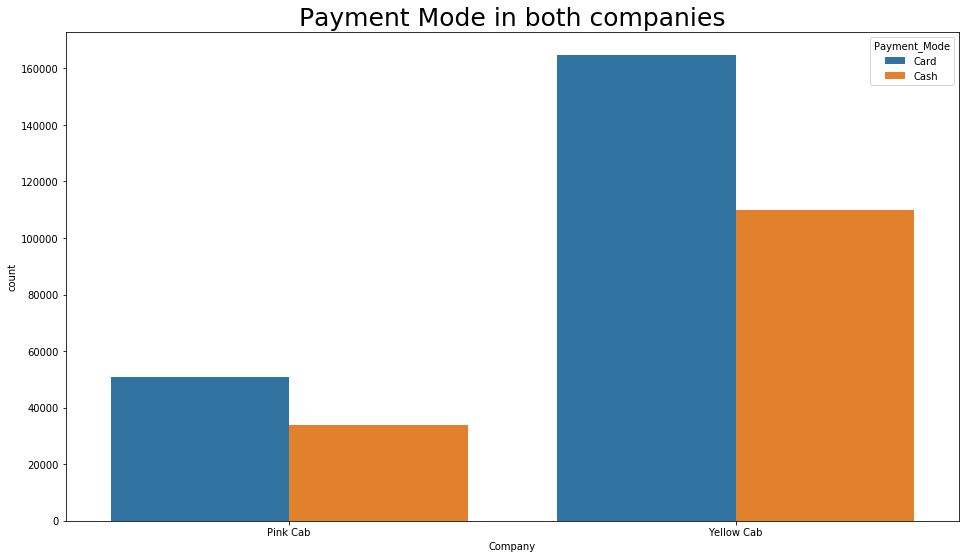

In [581]:
plt.figure(figsize = (16, 9))
ax = sns.countplot(x="Company", hue="Payment_Mode", data=Master_Data)
plt.title('Payment Mode in both companies', fontsize=25)
plt.show()

Yellow cab has more card payment rides

# Hypothesis Testing

H0 : Margin remains the same for both the Genders and the cabs. 
H1 : There is change in the margin

In [582]:
#Pink Cab

df['Profit'] = df['Price Charged'] - df['Cost of Trip']
a = df[(df.Gender=='Male')&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df.Gender=='Female')&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding gender for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding gender for Pink Cab')

47231 37480
P value is  0.11515305900425798
We accept null hypothesis (H0) that there is no difference regarding gender for Pink Cab


In [583]:
#Yellow Cab

df['Profit'] = df['Price Charged'] - df['Cost of Trip']
a = df[(df.Gender=='Male')&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df.Gender=='Female')&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding gender for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding gender for Yellow Cab')

158681 116000
P value is  6.060473042494144e-25
We accept alternative hypothesis (H1) that there is a difference regarding gender for Yellow Cab


# Margins by Age 

In [584]:
a = df[(df.Age <= 60)&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df.Age >= 60)&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding age for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding age for Pink Cab')

80125 5429
P value is  0.4816748536155635
We accept null hypothesis (H0) that there is no difference regarding age for Pink Cab


In [585]:
a = df[(df.Age <= 60)&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df.Age >= 60)&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding age for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding age for Yellow Cab')

260356 17257
P value is  6.328485471267631e-05
We accept alternative hypothesis (H1) that there is a difference regarding age for Yellow Cab


###### Margins by payment mode

In [586]:
a = df[(df['Payment_Mode']=='Cash')&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df['Payment_Mode']=='Card')&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference in payment mode for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference in payment mode for Pink Cab')

P value is  0.7900465828793288
We accept null hypothesis (H0) that there is no difference in payment mode for Pink Cab


In [587]:
a = df[(df['Payment_Mode']=='Cash')&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df['Payment_Mode']=='Card')&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference in payment mode for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference in payment mode for Yellow Cab')

P value is  0.29330606382985325
We accept null hypothesis (H0) that there is no difference in payment mode for Yellow Cab
